In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
jobs = pd.read_csv('../output/ScrapedJobOffersAllCleaned.csv', encoding='utf-8')

In [3]:
# Funktion zur Klassifikation der Rolle anhand des Titels
def classify_role(title):
    title_low = str(title).lower()
    if 'scientist' in title_low:
        return 'Scientist'
    elif 'engineer' in title_low:
        return 'Engineer'
    elif 'analyst' in title_low:
        return 'Analyst'
    else:
        return None

In [4]:
# Rolle ableiten und Datensatz filtern
jobs['role'] = jobs['job_title'].apply(classify_role)
jobs_role = jobs.dropna(subset=['role'])

# Median-Gehälter nach Stadt und Rolle
median_salary_city = jobs_role.groupby('city')['annual_salary'] \
    .median() \
    .sort_values(ascending=False)
median_salary_role = jobs_role.groupby('role')['annual_salary'] \
    .median() \
    .sort_values(ascending=False)

print("Median Salary by City:")
print(median_salary_city, '\n')
print("Median Salary by Role:")
print(median_salary_role)

Median Salary by City:
city
München      77000.0
Frankfurt    74000.0
Hamburg      73000.0
Köln         73000.0
Berlin       70000.0
Innsbruck    55300.0
Wien         54000.0
Linz         53802.0
Graz         53500.0
Salzburg     50000.0
Name: annual_salary, dtype: float64 

Median Salary by Role:
role
Scientist    74000.0
Analyst      72000.0
Engineer     69000.0
Name: annual_salary, dtype: float64


/var/folders/gt/2q1t88w95z77rlrh16c5y6300000gn/T/ipykernel_13369/351372326.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_city, labels=cities, showfliers=True)


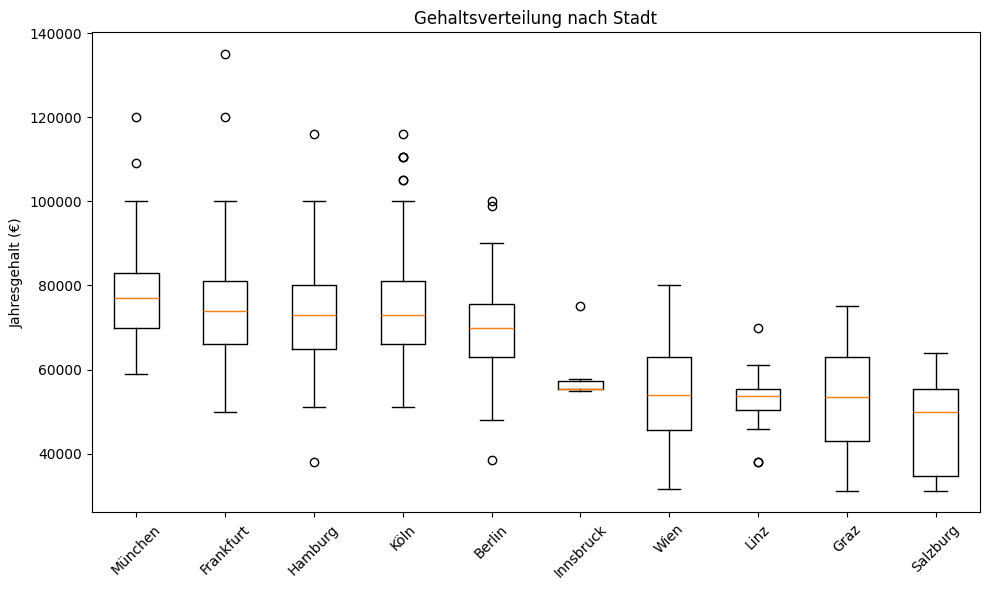

In [5]:
# Boxplot: Gehälter nach Stadt
cities = median_salary_city.index.tolist()
data_city = [jobs_role[jobs_role['city'] == city]['annual_salary'] for city in cities]

plt.figure(figsize=(10, 6))
plt.boxplot(data_city, labels=cities, showfliers=True)
plt.xticks(rotation=45)
plt.title('Gehaltsverteilung nach Stadt')
plt.ylabel('Jahresgehalt (€)')
plt.tight_layout()
plt.show()

/var/folders/gt/2q1t88w95z77rlrh16c5y6300000gn/T/ipykernel_13369/1577752070.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_role, labels=roles, showfliers=True)


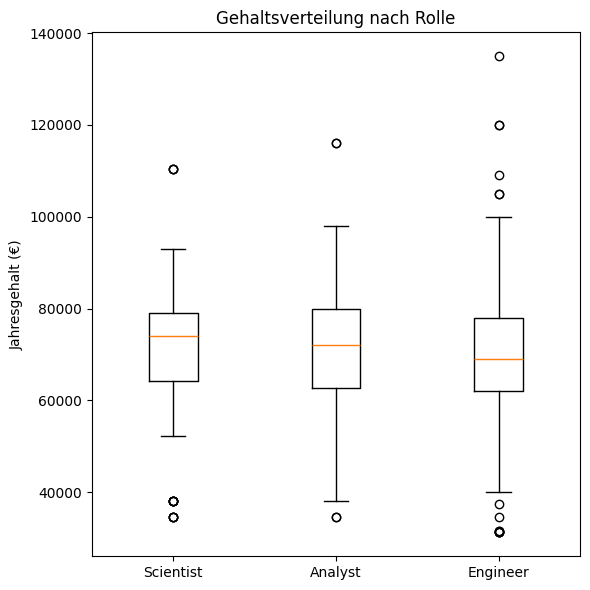

In [6]:
# Boxplot: Gehälter nach Rolle
roles = median_salary_role.index.tolist()
data_role = [jobs_role[jobs_role['role'] == role]['annual_salary'] for role in roles]
plt.figure(figsize=(6, 6))
plt.boxplot(data_role, labels=roles, showfliers=True)
plt.title('Gehaltsverteilung nach Rolle')
plt.ylabel('Jahresgehalt (€)')
plt.tight_layout()
plt.show()